In [1]:
from tesser import util
from tesser import fit
from tesser import network
from tesser import sr
from tesser import rsa 
from tesser import plot_models
import importlib

data_dir = '/Users/morton/data/tesser'
subject = 112

In [2]:
# load structure learning and induction data for one subject
df_struct = util.load_struct(data_dir, subject)
df_induct = util.load_induction(data_dir, subject)

In [3]:
# estimate parameters for this subject
alpha, gamma = fit.maximize_likelihood(df_struct, df_induct, 
                                       'differential evolution')
print(f'parameters for subject {subject}: alpha={alpha:.2f}, gamma={gamma:.2f}')

/Users/morton/PycharmProjects/tesser_successor/tesser/fit.py:11: RuntimeWarning: invalid value encountered in double_scalars
  return SR[A][B] / (SR[A][B] + SR[A][C])


--- 19.054774045944214 seconds ---
parameters for subject 112: alpha=0.95, gamma=1.00


/Users/morton/anaconda3/envs/python3.6/lib/python3.6/site-packages/IPython/core/pylabtools.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


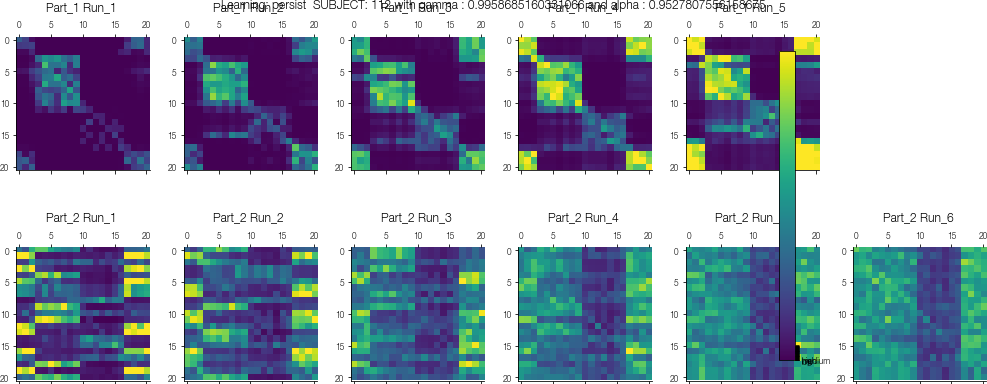

In [4]:
# plot the SR matrix after each run
M = sr.learn_sr(df_struct, gamma, alpha)
plot_models.plot_explore_runs(M, subject, 'persist', gamma, alpha, vmax=10)